Some notes which I had taken down for pandas.

In [1]:
import pandas as pd
import numpy as np

Searching and replacing a pattern in a column in a pandas dataframe

In [2]:
d = {
    'id': [100, 200], 
    'details': ['{"name" => "abc", "age" => 23}', '{"name" => "def", "age" => 24}']
    }
df = pd.DataFrame(d)
df

,id,details
0,100,"{""name"" => ""abc"", ""age"" => 23}"
1,200,"{""name"" => ""def"", ""age"" => 24}"


Now let's replace the '=>' in the second column to convert the data into json format

In [3]:
df['details'] = df['details'].str.replace('=>', ':')
df

,id,details
0,100,"{""name"" : ""abc"", ""age"" : 23}"
1,200,"{""name"" : ""def"", ""age"" : 24}"


Lets add another column into the dataframe

In [4]:
sports = ['Football|Cricket', 'Football|Hockey|Chess|Badminton']
df['sports'] = sports
df

,id,details,sports
0,100,"{""name"" : ""abc"", ""age"" : 23}",Football|Cricket
1,200,"{""name"" : ""def"", ""age"" : 24}",Football|Hockey|Chess|Badminton


Now to convert the 'sports' column into a json array split by '|', we have apply the following logic of converting a list to a json array on the whole column- 

In [5]:
import json

In [6]:
x = [str(i) for i in range(10)]
x

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [7]:
json.dumps(x)

'["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]'

Now let's apply this to the whole column.

In [8]:
df['sports'] = df['sports'].str.split('|').apply(lambda x: json.dumps(x))
df

,id,details,sports
0,100,"{""name"" : ""abc"", ""age"" : 23}","[""Football"", ""Cricket""]"
1,200,"{""name"" : ""def"", ""age"" : 24}","[""Football"", ""Hockey"", ""Chess"", ""Badminton""]"


### Dropping columns in a Dataframe. 

Let's create a fake dataset using faker first

In [9]:
from faker import Faker

In [10]:
fake = Faker()

In [11]:
df = pd.DataFrame()
df['name'] = [fake.name() for _ in range(1000)]
df['ip'] = [fake.ipv4_private(network=False, address_class=None) for _ in range(1000)]
df['isTrue'] = np.random.randint(0, 2, size=1000, dtype=np.uint8).view(bool)
df['phone'] = [fake.phone_number() for _ in range(1000)]
df['job'] = [fake.job() for _ in range(1000)]
df['location'] = [fake.locale() for _ in range(1000)]
df['md5'] = [fake.md5(raw_output=False) for _ in range(1000)]

In [12]:
df

,name,ip,isTrue,phone,job,location,md5
0,Justin Lawson,192.168.136.103,True,+90(7)2449997795,Speech and language therapist,ms_MY,8e126e4e9882ba09706c399c321779dc
1,Kerry Faulkner,172.26.247.199,False,(942)964-0915,Psychiatric nurse,fa_IR,24128aaff348c2b7a29c7d8b5ba91390
2,Ashley Lloyd,10.88.46.87,True,+09(4)8987765771,Publishing copy,ce_RU,819a8bde3148e961d31e143d57867434
3,Zachary Mcgee,192.168.250.130,True,1-458-610-9733x6203,Futures trader,sid_ET,b759fe5773f8d72d3dadb6da2942a33d
4,Larry Holder,10.102.96.134,True,03257067963,Manufacturing engineer,el_CY,1a37948cc7aaf6468882d31cca198a61
5,Ryan Braun,192.168.40.160,False,(332)123-7442x14860,Quarry manager,ky_KG,93ee48d3c02aeba48c9e99aa17f21aba
6,Andrea Rodriguez,172.21.218.60,True,348-473-0515,Chief Executive Officer,mg_MG,ccdbd445f7dab095ae76b75b0684aa89
7,Katherine Hill,10.174.211.148,True,096-699-4411,"Civil engineer, consulting",sq_AL,acb3b35ebb2ef06297214d01c7cceea5
8,Rachel Sanchez,192.168.191.96,True,607.751.4886x05908,"Social research officer, government",dv_MV,0da7c784815d8ffd71d84396deeed74a
9,Gregory Barry,10.249.143.254,True,(459)704-3466x19834,"Producer, television/film/video",vi_VN,87316f33b8200ab3d3931783fa2a0065


Now if we want to remove the columns 'isTrue' and 'md5'

In [13]:
to_drop = ['isTrue', 'md5']
df.drop(to_drop, inplace=True, axis=1)
df

,name,ip,phone,job,location
0,Justin Lawson,192.168.136.103,+90(7)2449997795,Speech and language therapist,ms_MY
1,Kerry Faulkner,172.26.247.199,(942)964-0915,Psychiatric nurse,fa_IR
2,Ashley Lloyd,10.88.46.87,+09(4)8987765771,Publishing copy,ce_RU
3,Zachary Mcgee,192.168.250.130,1-458-610-9733x6203,Futures trader,sid_ET
4,Larry Holder,10.102.96.134,03257067963,Manufacturing engineer,el_CY
5,Ryan Braun,192.168.40.160,(332)123-7442x14860,Quarry manager,ky_KG
6,Andrea Rodriguez,172.21.218.60,348-473-0515,Chief Executive Officer,mg_MG
7,Katherine Hill,10.174.211.148,096-699-4411,"Civil engineer, consulting",sq_AL
8,Rachel Sanchez,192.168.191.96,607.751.4886x05908,"Social research officer, government",dv_MV
9,Gregory Barry,10.249.143.254,(459)704-3466x19834,"Producer, television/film/video",vi_VN


### Inspecting columns

In [14]:
%matplotlib inline

Lets inpect the job column to figure out the max length of the values and plot the general trend.

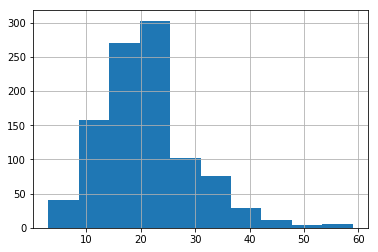

In [15]:
col = 'job'
df['len_job'] = df[col].str.len()
df['len_job'].hist()

Now lets find out what this value is

In [16]:
df[col].str.len().max()

59

In [17]:
sorted_lens = df[col].str.len().sort_values().index
sorted_lens[-1]

117

117 is the index of the column. Lets print it and check

In [18]:
df.iloc[sorted_lens[-1]][col]

'Scientist, clinical (histocompatibility and immunogenetics)'